## Summer Clothing Sales Prediction

Data source: https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf

2025-04-27 10:17:41.933491: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
data

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

### Preprocessing

In [4]:
df = data.copy()

In [5]:
columns_to_drop = ['title', 'title_orig', 'currency_buyer', 'shipping_option_name', 'urgency_text', 'merchant_title', 'merchant_name',
                  'merchant_info_subtitle', 'merchant_id', 'merchant_profile_picture', 'product_url', 'product_id', 'tags', 'has_urgency_banner',
                  'theme', 'crawl_month', 'origin_country', 'product_picture']

In [6]:
df = df.drop(columns_to_drop, axis=1)
df

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,white,M,50,4,0,34,50,568,4.128521,0
1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,green,XS,50,2,0,41,50,17752,3.899673,0
2,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,leopardprint,XS,1,3,0,36,50,295,3.989831,0
3,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,black,M,50,2,0,41,50,23832,4.020435,0
4,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,yellow,S,1,1,0,35,50,14482,4.001588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,navyblue,S,50,2,0,41,50,5316,4.224605,0
1569,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,lightblue,S,2,1,0,26,50,4435,3.696054,0
1570,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,white,SIZE S,15,2,0,11,50,210,3.961905,0
1571,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,white,Size S.,36,3,0,29,50,31,3.774194,0


In [7]:
df.isnull().sum()

price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
rating_five_count               45
rating_four_count               45
rating_three_count              45
rating_two_count                45
rating_one_count                45
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
product_color                   41
product_variation_size_id       14
product_variation_inventory      0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

#### Encoding

In [8]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   product_color              1532 non-null   object
 1   product_variation_size_id  1559 non-null   object
dtypes: object(2)
memory usage: 24.7+ KB


In [9]:
df['product_variation_size_id'].value_counts()

product_variation_size_id
S                      641
XS                     356
M                      200
XXS                    100
L                       49
                      ... 
6XL                      1
AU plug Low quality      1
XXXL                     1
25-S                     1
SIZE S                   1
Name: count, Length: 106, dtype: int64

In [10]:
size_ordering = ['XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL']

In [11]:
def ordinal_encode(data, column, ordering):
    return data[column].apply(lambda x: ordering.index(x) if x in ordering else None)

In [12]:
df['product_variation_size_id'] = ordinal_encode(df, 'product_variation_size_id', size_ordering)

In [13]:
df['product_variation_size_id']

0       3.0
1       1.0
2       1.0
3       3.0
4       2.0
       ... 
1568    2.0
1569    2.0
1570    NaN
1571    NaN
1572    2.0
Name: product_variation_size_id, Length: 1573, dtype: float64

In [15]:
df['product_color'].unique()

array(['white', 'green', 'leopardprint', 'black', 'yellow', 'navyblue',
       'blue', 'beige', 'grey', 'lightblue', 'orange', 'red', 'Black',
       'armygreen', nan, 'pink', 'khaki', 'red & blue', 'blue & pink',
       'RED', 'white & green', 'winered', 'black & green', 'purple',
       'whitefloral', 'floral', 'fluorescentgreen', 'orange & camouflage',
       'lightyellow', 'coolblack', 'multicolor', 'camouflage',
       'lightpink', 'pink & black', 'silver', 'Army green', 'lightgreen',
       'mintgreen', 'pink & grey', 'gray', 'coffee', 'rose',
       'light green', 'leopard', 'black & white', 'orange-red',
       'dustypink', 'White', 'star', 'white & black', 'apricot',
       'skyblue', 'burgundy', 'claret', 'pink & white', 'rosered', 'tan',
       'navy blue', 'wine red', 'lightred', 'Pink', 'coralred', 'brown',
       'lakeblue', 'darkblue', 'camel', 'pink & blue', 'nude', 'Blue',
       'lightpurple', 'army', 'black & stripe', 'Rose red',
       'greysnakeskinprint', 'denimbl

In [16]:
def onehot_encode(data, column):
    dummies = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, dummies], axis=1)
    data.drop(column, axis=1, inplace=True)
    return data

In [17]:
df = onehot_encode(df, 'product_color')

In [18]:
df

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,product_color_Army green,product_color_Black,product_color_Blue,product_color_Pink,product_color_RED,product_color_Rose red,product_color_White,product_color_applegreen,product_color_apricot,product_color_army,product_color_army green,product_color_armygreen,product_color_beige,product_color_black,product_color_black & blue,product_color_black & green,product_color_black & stripe,product_color_black & white,product_color_black & yellow,product_color_blackwhite,product_color_blue,product_color_blue & pink,product_color_brown,product_color_brown & yellow,product_color_burgundy,product_color_camel,product_color_camouflage,product_color_claret,product_color_coffee,product_color_coolblack,product_color_coralred,product_color_darkblue,product_color_darkgreen,product_color_denimblue,product_color_dustypink,product_color_floral,product_color_fluorescentgreen,product_color_gold,product_color_gray,product_color_gray & white,product_color_green,product_color_grey,product_color_greysnakeskinprint,product_color_ivory,product_color_jasper,product_color_khaki,product_color_lakeblue,product_color_leopard,product_color_leopardprint,product_color_light green,product_color_lightblue,product_color_lightgray,product_color_lightgreen,product_color_lightgrey,product_color_lightkhaki,product_color_lightpink,product_color_lightpurple,product_color_lightred,product_color_lightyellow,product_color_mintgreen,product_color_multicolor,product_color_navy,product_color_navy blue,product_color_navyblue,product_color_navyblue & white,product_color_nude,product_color_offblack,product_color_offwhite,product_color_orange,product_color_orange & camouflage,product_color_orange-red,product_color_pink,product_color_pink & black,product_color_pink & blue,product_color_pink & grey,product_color_pink & white,product_color_prussianblue,product_color_purple,product_color_rainbow,product_color_red,product_color_red & blue,product_color_rose,product_color_rosegold,product_color_rosered,product_color_silver,product_color_skyblue,product_color_star,product_color_tan,product_color_violet,product_color_watermelonred,product_color_white,product_color_white & black,product_color_white & green,product_color_white & red,product_color_whitefloral,product_color_whitestripe,product_color_wine,product_color_wine red,product_color_winered,product_color_winered & yellow,product_color_yellow
0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,3.0,50,4,0,34,50,568,4.128521,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,1.0,50,2,0,41,50,17752,3.899673,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [20]:
(df.dtypes=='object').sum()

0

In [52]:
null_columns = df.loc[:, df.isna().sum() > 0].columns
null_columns

Index(['rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'product_variation_size_id'],
      dtype='object')

In [54]:
for column in null_columns:
    df[column] = df[column].fillna(df[column].mean())

In [55]:
df.isnull().sum().sum()

0

#### Scaling

In [56]:
y = df['units_sold']
X = df.drop('units_sold', axis=1)

In [57]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,price,retail_price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,product_color_Army green,product_color_Black,product_color_Blue,product_color_Pink,product_color_RED,product_color_Rose red,product_color_White,product_color_applegreen,product_color_apricot,product_color_army,product_color_army green,product_color_armygreen,product_color_beige,product_color_black,product_color_black & blue,product_color_black & green,product_color_black & stripe,product_color_black & white,product_color_black & yellow,product_color_blackwhite,product_color_blue,product_color_blue & pink,product_color_brown,product_color_brown & yellow,product_color_burgundy,product_color_camel,product_color_camouflage,product_color_claret,product_color_coffee,product_color_coolblack,product_color_coralred,product_color_darkblue,product_color_darkgreen,product_color_denimblue,product_color_dustypink,product_color_floral,product_color_fluorescentgreen,product_color_gold,product_color_gray,product_color_gray & white,product_color_green,product_color_grey,product_color_greysnakeskinprint,product_color_ivory,product_color_jasper,product_color_khaki,product_color_lakeblue,product_color_leopard,product_color_leopardprint,product_color_light green,product_color_lightblue,product_color_lightgray,product_color_lightgreen,product_color_lightgrey,product_color_lightkhaki,product_color_lightpink,product_color_lightpurple,product_color_lightred,product_color_lightyellow,product_color_mintgreen,product_color_multicolor,product_color_navy,product_color_navy blue,product_color_navyblue,product_color_navyblue & white,product_color_nude,product_color_offblack,product_color_offwhite,product_color_orange,product_color_orange & camouflage,product_color_orange-red,product_color_pink,product_color_pink & black,product_color_pink & blue,product_color_pink & grey,product_color_pink & white,product_color_prussianblue,product_color_purple,product_color_rainbow,product_color_red,product_color_red & blue,product_color_rose,product_color_rosegold,product_color_rosered,product_color_silver,product_color_skyblue,product_color_star,product_color_tan,product_color_violet,product_color_watermelonred,product_color_white,product_color_white & black,product_color_white & green,product_color_white & red,product_color_whitefloral,product_color_whitestripe,product_color_wine,product_color_wine red,product_color_winered,product_color_winered & yellow,product_color_yellow
0,0.312500,0.051793,0.0,0.6900,0.002603,0.002251,0.001927,0.002734,0.000499,0.003227,0.0,0.0,0.0,0.0,0.500000,1.000000,0.272727,0.0,0.208955,1.0,0.000261,0.673195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.145833,0.083665,1.0,0.6125,0.295748,0.196484,0.247351,0.305631,0.321518,0.386160,0.0,0.0,0.0,0.0,0.166667,1.000000,0.090909,0.0,0.261194,1.0,0.008163,0.587377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.145833,0.167331,0.0,0.6425,0.000675,0.000433,0.000963,0.000547,

In [58]:
y

0         100
1       20000
2         100
3        5000
4         100
        ...  
1568    10000
1569      100
1570      100
1571      100
1572      100
Name: units_sold, Length: 1573, dtype: int64

In [61]:
encoder = LabelEncoder()

y = encoder.fit_transform(y)

y_mappings = {index: label for index, label in enumerate(encoder.classes_)}
y_mappings

{0: 1,
 1: 2,
 2: 3,
 3: 6,
 4: 7,
 5: 8,
 6: 10,
 7: 50,
 8: 100,
 9: 1000,
 10: 5000,
 11: 10000,
 12: 20000,
 13: 50000,
 14: 100000}

In [62]:
y

array([ 8, 12,  8, ...,  8,  8,  8])

### Training

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=36)

In [65]:
inputs = tf.keras.Input(shape=(124,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(15, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

batch_size=32
epochs=300

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs
)

2025-04-27 10:54:33.681667: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


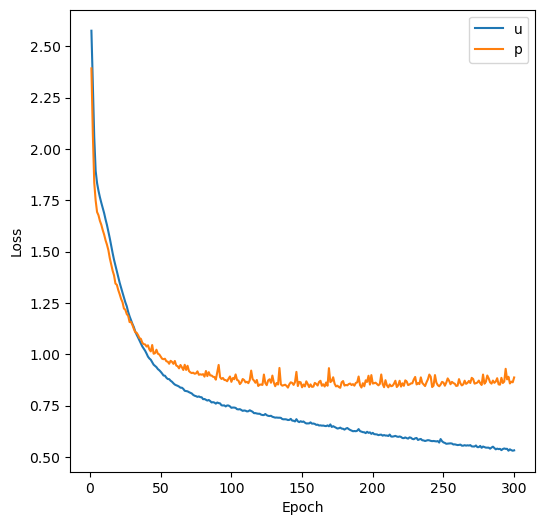

In [68]:
plt.figure(figsize=(6, 6))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend('upper right')

plt.show()

In [69]:
np.argmin(val_loss)

176

In [70]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 4ms/step - loss: 1.2937 - accuracy: 0.6317


[1.29369056224823, 0.6317460536956787]